In [1]:
import time
import numpy
from topopt.boundary_conditions import MBBBeamBoundaryConditions, CantileverBoundaryConditions
from topopt.problems import ComplianceProblem
from topopt.solvers import TopOptSolver
from topopt.filters import DensityBasedFilter, SensitivityBasedFilter
from topopt.guis import GUI

In [2]:
nelx, nely = 180, 60  # Number of elements in the x and y
volfrac = 0.3  # Volume fraction for constraints
penal = 3.0  # Penalty for SIMP
rmin = 4.0  # Filter radius

In [3]:
# Initial solution
x = volfrac * numpy.ones(nely * nelx, dtype=float)

# Boundary conditions defining the loads and fixed points
# bc = MBBBeamBoundaryConditions(nelx, nely)
bc = CantileverBoundaryConditions(nelx, nely)

# Problem to optimize given objective and constraints
problem = ComplianceProblem(bc, penal)

topopt_filter = DensityBasedFilter(nelx, nely, rmin)
# topopt_filter = SensitivityBasedFilter(nelx, nely, rmin)

In [4]:
solver = TopOptSolver(problem, volfrac, topopt_filter, maxeval=2000, ftol_rel=1e-3)

In [5]:
print(repr(solver))

TopOptSolver(problem=ComplianceProblem(bc=3.0, penalty=CantileverBoundaryConditions), volfrac=0.3, filter=DensityBasedFilter(nelx=180, nely=60, rmin=4), gui=None, maxeval=2000, ftol=0.001)


In [6]:
x_opt = solver.optimize(x)

Topopt total computation time: 7.26 s, total iter 35, avr iter time 0.20731817654200962 s
last object value 385.88, terminated due to xtol reached
Max eval: 2000 | xtol_abs [0.001 0.001 0.001 ... 0.001 0.001 0.001] | xtol_rel 0.0 | ftol_rel 0.001


In [7]:
print("#of evals: {} | stopval {}".format(solver.opt.get_numevals(), solver.opt.get_stopval()))
print('max eval {}'.format(solver.opt.get_maxeval()))
print('max time {}'.format(solver.opt.get_maxtime()))
print("ftol_abs: {} | xtol_abs {}".format(solver.opt.get_ftol_abs(), solver.opt.get_xtol_abs()))

#of evals: 35 | stopval -inf
max eval 2000
max time 0.0
ftol_abs: 0.0 | xtol_abs [0.001 0.001 0.001 ... 0.001 0.001 0.001]


https://nlopt.readthedocs.io/en/latest/NLopt_Python_Reference/

c:\users\harry\dropbox (mit)\code_ws_dropbox\matlab_ws\topopt\topopt\guis.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


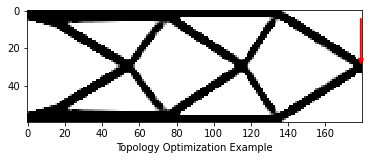

In [8]:
gui = GUI(problem, "Topology Optimization Example")
gui.update(x_opt)